In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__, ".."))

  Activating project at `~/Research/GaussianSpin`


In [21]:
using Distributions
using GaussianSpin
using HDF5
using KernelDensity
using LaTeXStrings
using MCMCChains
using Printf
using StatsBase
using StatsPlots

In [3]:
trace = h5open(joinpath(@__DIR__, "..", "chains", "gaussian_spin1.h5"), "r") do f
    read(f, Chains)
end
var_names = [:Neff, :beta, :mu_Z1_fit, :dmu_Z1_dq, :sz1, :sxy1, :rho1, :q, :chieff]
trace[var_names]

Chains MCMC chain (1000×9×4 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 4
Samples per chain = 1000
parameters        = Neff, beta, chieff, dmu_Z1_dq, mu_Z1_fit, q, rho1, sxy1, sz1
internals         = 

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

        Neff   78.9225   28.3695     0.4486    0.4958   2905.5780    1.0008
        beta    2.4824    0.9094     0.0144    0.0182   2710.5295    1.0009
      chieff    0.0734    0.0933     0.0015    0.0017   3769.9147    1.0010
   dmu_Z1_dq   -0.4773    0.1844     0.0029    0.0047   1626.7898    0.9998
   mu_Z1_fit    0.1135    0.0336     0.0005    0.0006   2704.9404    1.0005
           q    0.7718    0.1879     0.0030    0.0031   3686.9641    0.9997
        rho1    0.1705    0.2679     0.0042    0.0071   2149.1453    1.0015
        sxy1    0.0814    0.0520     0.0008    0.0011   2276.9707 

┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /Users/wfarr/.julia/packages/MCMCChains/IKF6o/src/chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /Users/wfarr/.julia/packages/MCMCChains/IKF6o/src/chains.jl:364


In [13]:
k = kde((vec(trace[:chieff]), vec(trace[:q])))
plot(k, colorbar=nothing, c=:Blues, levels=kde_credible_levels(k, 0.1:0.1:0.9), xlabel=L"\chi_\mathrm{eff}", ylabel=L"q", xlims=(-0.2, 0.5), ylims=(0, 1))
@df trace scatter!(:chieff, :q, color=1, alpha=0.1, label=nothing, markersize=1)

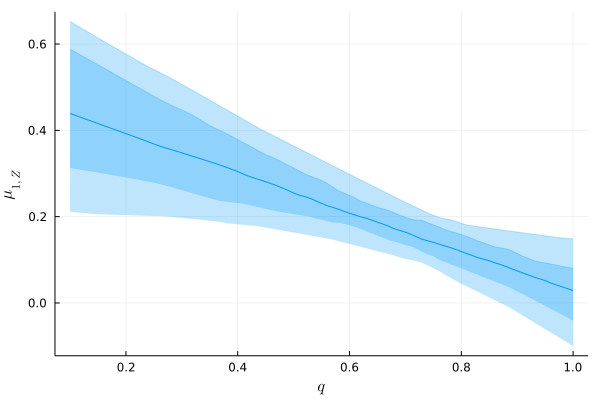

In [20]:
q = 0.1:0.01:1
mus = Vector{Float64}[]
for (m1, mp1) in sample(collect(zip(trace[:mu_Z1], trace[:mu_Zp1])), 100)
    push!(mus, mu_Z1_relation.(m1, mp1, q))
end

p = plot(q, [median([x[i] for x in mus]) for i in 1:length(q)], legend=nothing, color=1, xlabel=L"q", ylabel=L"\mu_{1,Z}")
p = plot!(q, [quantile([x[i] for x in mus], 0.84) for i in 1:length(q)], fillrange=[quantile([x[i] for x in mus], 0.16) for i in 1:length(q)], alpha=0.25, label=nothing, color=1)
p = plot!(q, [quantile([x[i] for x in mus], 0.975) for i in 1:length(q)], fillrange=[quantile([x[i] for x in mus], 0.025) for i in 1:length(q)], alpha=0.25, label=nothing, color=1)
p

In [22]:
println(@sprintf("P(chi_eff < 0) = %.2f", sum(trace[:chieff].<0)/length(trace[:chieff])))

P(chi_eff < 0) = 0.20


In [34]:
k = kde((vec(trace["xyz1[1]"]), vec(trace["xyz1[3]"])))
plot(k, levels=kde_credible_levels(k, 0.1:0.1:0.9), c=:Blues, colorbar=nothing, xlabel=L"s_{1,x}", ylabel=L"s_{1,z}",
     xlims=(-0.3, 0.3), ylims=(-0.25, 0.5))

In [32]:
tilts = map(trace["xyz1[1]"], trace["xyz1[2]"], trace["xyz1[3]"]) do x, y, z
    acos(z / sqrt(x*x+y*y+z*z))
end;

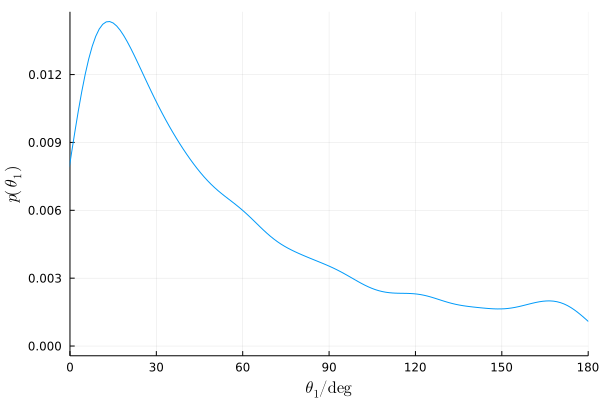

In [43]:
density(vec(tilts.*180 ./ pi), xlabel=L"\theta_1 / \mathrm{deg}", ylabel=L"p\left(\theta_1\right)", legend=nothing, xlims=(0,180))

In [44]:
0.5 / sqrt(1-0.25)

0.5773502691896258